In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sys.path.append('../models_new')
import model_utils_new as util
from construct_model_matrices_random  import ModelMatrixConstructor

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#DATA_DIR = '../../data/Xy_internal_split_data'
DATA_DIR = '../../data/Xy_random_split_data'

In [3]:
matrix_constructor = ModelMatrixConstructor(DATA_DIR)

In [4]:
data_sets = matrix_constructor.construct_model_matrices()

Train:
  ['X_train_1998.csv', 'X_train_1999.csv', 'X_train_2000.csv', 'X_train_2001.csv', 'X_train_2002.csv', 'X_train_2003.csv', 'X_train_2004.csv', 'X_train_2005.csv', 'X_train_2006.csv', 'X_train_2007.csv', 'X_train_2008.csv', 'X_train_2009.csv', 'X_train_2010.csv', 'X_train_2011.csv', 'X_train_2012.csv', 'X_train_2013.csv', 'X_train_2014.csv', 'X_train_2015.csv'] 
  ['y_train_1998.csv', 'y_train_1999.csv', 'y_train_2000.csv', 'y_train_2001.csv', 'y_train_2002.csv', 'y_train_2003.csv', 'y_train_2004.csv', 'y_train_2005.csv', 'y_train_2006.csv', 'y_train_2007.csv', 'y_train_2008.csv', 'y_train_2009.csv', 'y_train_2010.csv', 'y_train_2011.csv', 'y_train_2012.csv', 'y_train_2013.csv', 'y_train_2014.csv', 'y_train_2015.csv']
Valid:
  ['X_valid_1998.csv', 'X_valid_1999.csv', 'X_valid_2000.csv', 'X_valid_2001.csv', 'X_valid_2002.csv', 'X_valid_2003.csv', 'X_valid_2004.csv', 'X_valid_2005.csv', 'X_valid_2006.csv', 'X_valid_2007.csv', 'X_valid_2008.csv', 'X_valid_2009.csv', 'X_valid_2010.cs

In [5]:
def print_dims(data_set, name):
    print('%s:\n X: %r\n y: %r' 
          % (name, data_set[0].shape, data_set[1].shape))

In [6]:
[[X_train, y_train], [X_valid, y_valid], [X_test, y_test]] = data_sets
for (data_set, name) in zip(data_sets, ['Train', 'Valid', 'Test']):
    print_dims(data_set, name)

Train:
 X: (777026, 118)
 y: (777026, 1)
Valid:
 X: (96920, 118)
 y: (96920, 1)
Test:
 X: (96603, 118)
 y: (96603, 1)


In [7]:
print('NAs:')
for field in list(X_train):
    n_na = sum(np.isnan(X_train[field]))
    if n_na:
        print('%s:\t%d' % (field, n_na))

NAs:
cv.gsp:	12290


In [8]:
max(X_test.x), max(X_test.y)

(-140000.0, 1540000.0)

In [9]:
X_train.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,age:density,age:summerTmean,age:summerP0,age:ddAugJul,density:JanTmin,density:Tmean,density:OptTsum,density:wd,density:mi,density:ddAugJul
0,-450000.0,-2040000.0,-104.676159,31.434503,1227,0,0,0,0.0,847.500488,...,0.0,0.0,0.0,0.0,-682.563771,14677.804535,77970.044922,9992.149656,463.728120,7.502922e+06
1,-440000.0,-2040000.0,-104.572405,31.439746,1570,0,0,0,0.0,1251.626587,...,0.0,0.0,0.0,0.0,-2743.434366,19347.301107,115149.645996,60921.833632,720.751640,1.012316e+07
2,-430000.0,-2040000.0,-104.468639,31.444873,1308,0,0,0,0.0,4498.790527,...,0.0,0.0,0.0,0.0,-6195.654439,75077.165423,413888.728515,270538.104990,2635.547257,3.783933e+07
3,-420000.0,-2040000.0,-104.364863,31.449881,1218,0,0,0,0.0,468.264038,...,0.0,0.0,0.0,0.0,-543.789977,8051.323996,43080.291504,27046.069544,278.252754,4.110422e+06
4,-410000.0,-2040000.0,-104.261077,31.454772,1167,0,0,0,0.0,3425.574951,...,0.0,0.0,0.0,0.0,-3234.618706,60060.967617,308301.745605,218041.219767,2059.538789,3.076166e+07


In [10]:
density_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'density')

matrix shape: (196, 359)


In [11]:
density_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'density')

matrix shape: (194, 352)


In [12]:
density_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'density')

matrix shape: (189, 354)


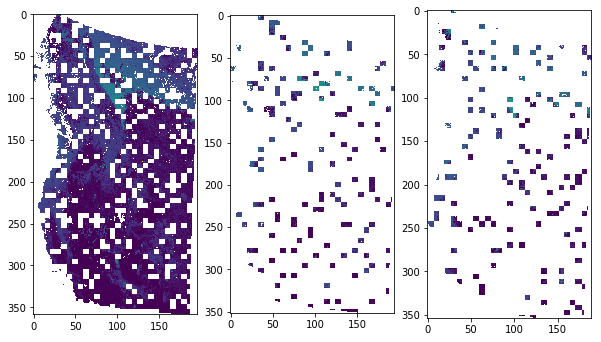

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(1, 3, 1);
imshow(np.rot90(density_matrix_train));
plt.subplot(1, 3, 2);
imshow(np.rot90(density_matrix_valid));
plt.subplot(1, 3, 3);
imshow(np.rot90(density_matrix_test));

In [14]:
btl_matrix_train = util.column2matrix(
    X_train.loc[X_train.year == 2009, :], 'btl_t1')
btl_matrix_valid = util.column2matrix(
    X_valid.loc[X_valid.year == 2009, :], 'btl_t1')
btl_matrix_test  = util.column2matrix(
    X_test.loc[X_test.year   == 2009, :], 'btl_t1')

matrix shape: (196, 359)
matrix shape: (194, 352)
matrix shape: (189, 354)


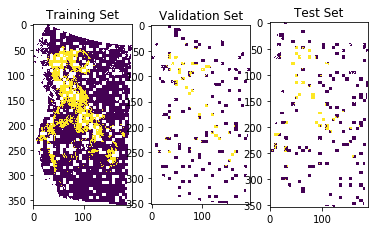

In [15]:
plt.subplot(1, 3, 1);
imshow(np.rot90(btl_matrix_train));
plt.title('Training Set');
plt.subplot(1, 3, 2);
imshow(np.rot90(btl_matrix_valid));
plt.title('Validation Set');
plt.subplot(1, 3, 3);
imshow(np.rot90(btl_matrix_test));
plt.title('Test Set');

In [16]:
util.print_percent_presence(y_train, 'y_train')
util.print_percent_presence(y_valid, 'y_valid')
util.print_percent_presence(y_test, 'y_test')

Percent presence in y_train: 13.03%
Percent presence in y_valid: 12.85%
Percent presence in y_test: 13.38%


In [18]:
print('Baseline accuracy if predicting "absent" for all cells:')
print('  train:', 100 - 13.03)
print('  valid:', 100 - 12.85)
print('  test: ', 100 - 13.38)

Baseline accuracy if predicting "absent" for all cells:
  train: 86.97
  valid: 87.15
  test:  86.62


In [19]:
y_train.columns=['btl_t']
y_valid.columns=['btl_t']
y_test.columns=['btl_t']

In [20]:
full_train = X_train.copy()
full_valid = X_valid.copy()
full_test = X_test.copy()

full_train['btl_t'] = y_train['btl_t']
full_valid['btl_t'] = y_valid['btl_t']
full_test['btl_t'] = y_test['btl_t']

In [21]:
drop = ['x', 'y', 'year']
X_train = X_train.drop(drop, axis=1)
X_valid = X_valid.drop(drop, axis=1)
X_test  = X_test.drop(drop, axis=1)

In [22]:
predictors = list(X_train)

In [23]:
def scale_data(X_train, X_valid, X_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_valid = scaler.transform(X_valid)
    X_test  = scaler.transform(X_test)
    return X_train, X_valid, X_test

In [24]:
def drop_NA(df):
    df = df[df.columns.drop(list(df.filter(regex='cv.gsp')))]
    return df

In [25]:
X_train = drop_NA(X_train)

In [26]:
X_valid = drop_NA(X_valid)
X_test = drop_NA(X_test)

In [27]:
X_train, X_valid, X_test = scale_data(X_train, X_valid, X_test) 

In [28]:
y_train = y_train['btl_t'].values.reshape(-1)
y_valid = y_valid['btl_t'].values.reshape(-1)
y_test  = y_test['btl_t'].values.reshape(-1)

In [29]:
# Find optimal regularization via best validation-set accuracy
l1_mods = []
l2_mods = []
Cs = np.logspace(-4, 0, 5)
best_C = np.nan
best_accuracy = 0
t0 = time.time()
best_penalty = None

for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']: #['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        if (accuracy > best_accuracy):
            best_C = C
            best_accuaracy = accuracy
            best_penalty = penalty
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.0001
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9347
Elapsed time: 0.22 minutes
  l2: 0.9364
Elapsed time: 0.58 minutes
Testing C = 0.001
  l1: 0.9364
Elapsed time: 1.16 minutes
  l2: 0.9366
Elapsed time: 1.79 minutes
Testing C = 0.01
  l1: 0.9367
Elapsed time: 5.95 minutes
  l2: 0.9366
Elapsed time: 7.45 minutes
Testing C = 0.1
  l1: 0.9372
Elapsed time: 77.33 minutes
  l2: 0.9369
Elapsed time: 83.15 minutes
Testing C = 1.0
  l1: 0.9372
Elapsed time: 219.88 minutes
  l2: 0.9373
Elapsed time: 224.77 minutes


In [30]:
!say "I'm done"

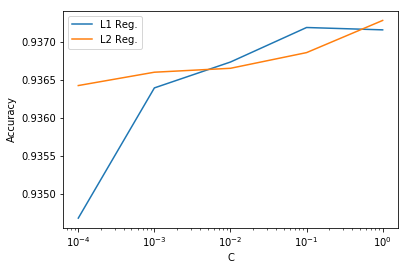

In [31]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [32]:
l1_mods = []
l2_mods = []
Cs = np.logspace(-1.5, 0, 4)

t0 = time.time()
for C in Cs:
    print('Testing C =', C)
    for penalty in ['l1', 'l2']:
        print('  %s:' % penalty, end=' ')
        logistic_clf = LogisticRegression(C=C, penalty=penalty, n_jobs=-1)
        logistic_clf.fit(X_train, y_train)
        preds = logistic_clf.predict(X_valid)
        accuracy = sum(y_valid == preds) / len(preds)
        print(round(accuracy, 4))
        if penalty == 'l1':
            l1_mods.append(accuracy)
        else:
            l2_mods.append(accuracy)
        print('Elapsed time: %.2f minutes' % ((time.time() - t0) / 60))

Testing C = 0.03162277660168379
  l1: 

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


0.9369
Elapsed time: 43.39 minutes
  l2: 0.9368
Elapsed time: 48.05 minutes
Testing C = 0.1
  l1: 0.9372
Elapsed time: 124.03 minutes
  l2: 0.9368
Elapsed time: 127.89 minutes
Testing C = 0.31622776601683794
  l1: 0.9373
Elapsed time: 184.84 minutes
  l2: 0.9372
Elapsed time: 190.95 minutes
Testing C = 1.0
  l1: 0.9371
Elapsed time: 292.11 minutes
  l2: 0.9373
Elapsed time: 299.87 minutes


In [33]:
!say "I'm done"

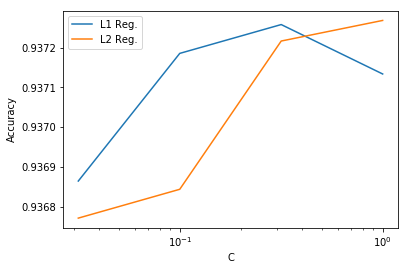

In [34]:
plt.plot(Cs, l1_mods, label='L1 Reg.');
plt.plot(Cs, l2_mods, label='L2 Reg.');
plt.xscale('log');
plt.xlabel('C');
plt.ylabel('Accuracy');
plt.legend(loc='best');

In [35]:
[(c, acc) for c, acc in zip(Cs, l2_mods)]

[(0.03162277660168379, 0.9367725959554272),
 (0.1, 0.9368448204704911),
 (0.31622776601683794, 0.9372162608336773),
 (1.0, 0.9372678497730087)]

In [36]:
best_C = 0.31622776601683794

In [37]:
logistic_clf = LogisticRegression(C=best_C, penalty='l2')
logistic_clf.fit(X_train, y_train)
preds = logistic_clf.predict(X_test)
probs = logistic_clf.predict_proba(X_test)
accuracy = sum(y_test == preds) / len(preds)
accuracy

0.9388217757212509

In [38]:
def get_predictions_at_threshold(pred_ps, threshold):
    return 1 * (pred_ps >= threshold)

def threshold_plot(pred_ps, targets):
    thresholds = np.linspace(0, 1, 500)
    accuracies = []
    n = len(pred_ps)

    for threshold in thresholds:
        preds = get_predictions_at_threshold(pred_ps, threshold)
        accuracies.append((preds == targets).sum() / n)
        
    plt.plot(thresholds, accuracies);
    optimal_threshold = thresholds[np.argmax(accuracies)]
    optimal_accuracy = max(accuracies)
    plt.plot([optimal_threshold, optimal_threshold], 
             [min(accuracies), max(accuracies)], 
             'r')
    plt.plot([0, 1], [optimal_accuracy, optimal_accuracy], 'r')
    plt.xlabel('Threshold for predicting "Renewal"')
    plt.ylabel('Accuracy')
    plt.show()
    return {'threshold': optimal_threshold, 'accuracy': optimal_accuracy}

[[9.99997539e-01 2.46140273e-06]
 [9.99998866e-01 1.13398529e-06]
 [9.99998789e-01 1.21102492e-06]
 [9.99998818e-01 1.18207774e-06]
 [9.99998973e-01 1.02662616e-06]]


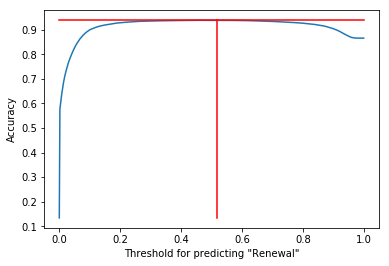

{'threshold': 0.5190380761523046, 'accuracy': 0.9389977536929495}


In [39]:
pred_ps = logistic_clf.predict_proba(X_test)
print(pred_ps[:5])
pred_ps = np.array([p[1] for p in pred_ps])
pred_ps[:5]

THRESHOLD = 0.5
preds = get_predictions_at_threshold(pred_ps, THRESHOLD)
preds[:5]

best_threshold = threshold_plot(pred_ps, y_test);
print(best_threshold)

In [40]:
cm = util.make_confusion_matrix(y_test, pred_ps, 0.5)
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9411		3519
        0	2391		81282
Accuracy:  0.9388217757212509
Precision: 0.7974072191154041
Recall:    0.7278422273781903
F1:        0.7610383309073265


In [41]:
cm = util.make_confusion_matrix(
    y_test, pred_ps, best_threshold['threshold'])
metrics = util.get_metrics(cm)

Confusion Matrix:
         Predicted:
         	1		0
Actual: 1	9311		3619
        0	2274		81399
Accuracy:  0.9389977536929495
Precision: 0.8037116961588261
Recall:    0.7201082753286929
F1:        0.7596165612890067


In [42]:
auc_metrics = util.get_auc(y_test, pred_ps)

AUC:       0.9722258995767128


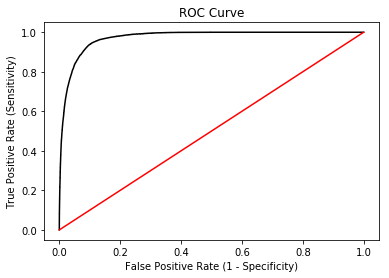

In [43]:
util.plot_roc(auc_metrics['fpr'], auc_metrics['tpr'])

In [44]:
coefs = pd.DataFrame(
    [[pred, coef] 
     for pred, coef in zip(predictors, logistic_clf.coef_[0])], 
    columns=['predictor', 'coef'])
coefs['abs'] = np.abs(coefs.coef)
coefs = coefs.sort_values('abs', ascending=False)
coefs = coefs.drop(['abs'], axis=1)
coefs

,predictor,coef
71,lon_sq,-4.794659
1,lat,4.053354
21,Tmean,-3.927348
87,Tvar_sq,-3.604002
12,TMarAug,3.468508
5,vgt,3.297153
20,Tmin,2.929860
14,AugTmean,-2.873942
101,TOctSep_cub,-2.541353
80,summerTmean_sq,2.407770


In [45]:
print(full_train.shape)
#type(pred_ps_train)

(777026, 119)


In [46]:
logistic_clf.predict_proba(X_train)

array([[9.99998612e-01, 1.38795099e-06],
       [9.99997547e-01, 2.45326194e-06],
       [9.99997686e-01, 2.31449171e-06],
       ...,
       [9.99952357e-01, 4.76425343e-05],
       [9.99974798e-01, 2.52022163e-05],
       [9.99976787e-01, 2.32125784e-05]])

In [47]:
pred_ps_train = logistic_clf.predict_proba(X_train)
pred_ps_train = np.array([p[1] for p in pred_ps_train])

pred_ps_valid = logistic_clf.predict_proba(X_valid)
pred_ps_valid = np.array([p[1] for p in pred_ps_valid])

full_train['probs'] = pred_ps_train
full_train['preds'] = get_predictions_at_threshold(
    pred_ps_train, best_threshold['threshold'])


full_valid['probs'] = pred_ps_valid
full_valid['preds'] = get_predictions_at_threshold(
    pred_ps_valid, best_threshold['threshold'])

In [48]:
full_test['probs'] = pred_ps
full_test['preds'] = get_predictions_at_threshold(
    pred_ps, best_threshold['threshold'])
full_test.head()

,x,y,lon,lat,etopo1,btl_t1,btl_t2,vgt,age,density,...,age:ddAugJul,density:JanTmin,density:Tmean,density:OptTsum,density:wd,density:mi,density:ddAugJul,btl_t,probs,preds
0,-600000.0,-2030000.0,-106.237864,31.432806,1175,0,0,0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0,0.000002,0
1,-720000.0,-2020000.0,-107.488989,31.430412,1193,0,0,0,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0,0.000001,0
2,-710000.0,-2020000.0,-107.385392,31.438843,1193,0,0,0,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0,0.000001,0
3,-700000.0,-2020000.0,-107.281776,31.447156,1187,0,0,0,0.0,0.0,...,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0,0.000001,0
4,-690000.0,-2020000.0,-107.178144,31.455352,1181,0,0,0,0.0,0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0,0.000001,0


In [49]:
def pred_plot(actual_matrix, pred_matrix, error_matrix, year):
    plt.subplot(131)
    imshow(np.rot90(actual_matrix));
    plt.title('%d Actual' % year);
    plt.subplot(132)
    imshow(np.rot90(pred_matrix));
    plt.title('%d Predicted' % year);
    plt.subplot(133)
    imshow(np.rot90(error_matrix));
    plt.title('%d Error' % year);

In [50]:
def make_actual_pred_and_error_matrices(
    data, year, pred_type='preds', plot=False):
    data_year = data.loc[data.year == year, :]
    actual_matrix = util.column2matrix(data_year, 'btl_t')
    pred_matrix   = util.column2matrix(data_year, pred_type)
    error_matrix  = pred_matrix - actual_matrix
    if plot:
        pred_plot(actual_matrix, pred_matrix, error_matrix, year)        
    return actual_matrix, pred_matrix, error_matrix

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)


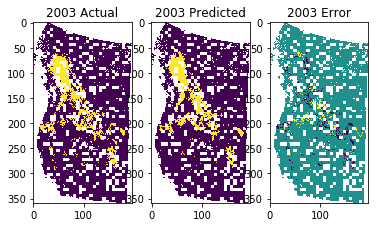

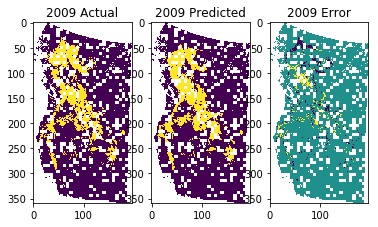

In [51]:
years = [2003, 2009]
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_train, year, plot=True)

matrix shape: (181, 346)
matrix shape: (181, 346)
matrix shape: (194, 352)
matrix shape: (194, 352)


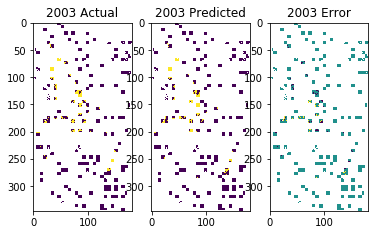

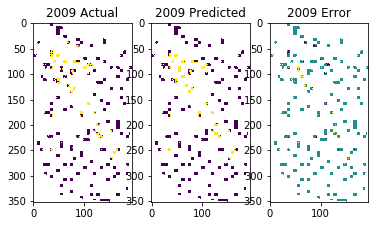

In [52]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_valid, year, plot=True)

matrix shape: (186, 338)
matrix shape: (186, 338)
matrix shape: (189, 354)
matrix shape: (189, 354)


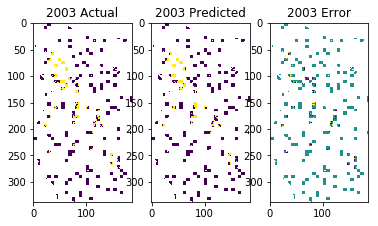

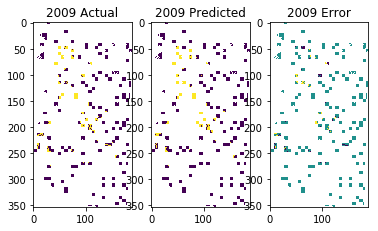

In [53]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(full_test, year, plot=True)

In [54]:
all_data = full_train.append(full_valid).append(full_test)
all_data.index = range(all_data.shape[0])

matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)
matrix shape: (196, 359)


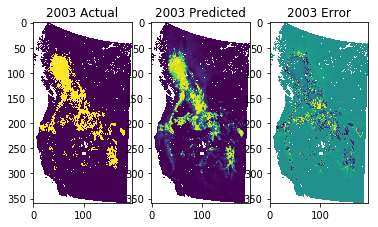

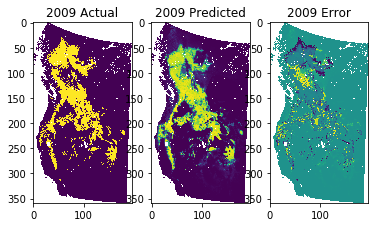

In [55]:
for year in years:
    plt.figure();
    make_actual_pred_and_error_matrices(
        all_data, year, pred_type='probs', plot=True)

In [56]:
!say "I'm done"